# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./datasets_calificaciones.csv')

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

In [94]:
df.shape

(100, 6)

In [4]:
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [124]:
df.isnull().sum()

estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

In [98]:
df.describe()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
count,100,100,95,90,89,100
unique,96,7,49,45,46,35
top,mateo díaz,matematicas,,7.5,9.5,99%
freq,2,25,7,5,4,5


### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

In [8]:
df['Parcial 1'] = df['Parcial 1'].replace(' ', pd.NA)
df['Parcial 1'] = pd.to_numeric(df['Parcial 1'], errors='coerce')
df['Parcial 1'] = df['Parcial 1'].fillna(df['Parcial 1'].median())
df['Parcial 1'].isnull().sum()

np.int64(0)

In [9]:
df['Parcial 2'] = df['Parcial 2'].replace(' ', pd.NA)
df['Parcial 2'] = pd.to_numeric(df['Parcial 2'], errors='coerce')
df['Parcial 2'] = df['Parcial 2'].fillna(df['Parcial 2'].median())
df['Parcial 2'].isnull().sum()

np.int64(0)

In [10]:
df['Final'] = df['Final'].replace(' ', pd.NA)
df['Final'] = pd.to_numeric(df['Final'], errors='coerce')
df['Final'] = df['Final'].fillna(df['Final'].median())
df['Final'].isnull().sum()

np.int64(0)

In [11]:
df['Asistencia'] = df['Asistencia'].str.replace('%', '')
df['Asistencia'] = pd.to_numeric(df['Asistencia'], errors='coerce')
df['Asistencia']

0      95
1      88
2     100
3      75
4      92
     ... 
95     81
96     92
97     83
98     98
99     87
Name: Asistencia, Length: 100, dtype: int64

In [12]:
df['estudiante'] = df['estudiante'].str.title()
df['estudiante']

0           Ana Pérez
1        Carlos López
2         María Gómez
3     Pedro Rodríguez
4        Laura Vargas
           ...       
95    Josefina Torres
96    Bautista Vargas
97          Emma Soto
98         Mateo Díaz
99    Sofía Fernández
Name: estudiante, Length: 100, dtype: object

In [13]:
df['Materia'] = df['Materia'].str.title()
df['Materia']

0     Matematicas
1          Fisica
2         Quimica
3        Historia
4     Matematicas
         ...     
95       Historia
96    Matematicas
97         Fisica
98        Quimica
99       Historia
Name: Materia, Length: 100, dtype: object

In [14]:
df.isnull().sum()

estudiante    0
Materia       0
Parcial 1     0
Parcial 2     0
Final         0
Asistencia    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   100 non-null    float64
 3   Parcial 2   100 non-null    float64
 4   Final       100 non-null    float64
 5   Asistencia  100 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


In [16]:
df.head(30)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos López,Fisica,6.2,7.0,7.8,88
2,María Gómez,Quimica,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,7.9,9.2,8.5,92
5,Javier Soto,Fisica,5.8,6.5,6.0,80
6,Sofia Díaz,Ciencias Sociales,9.5,9.1,7.8,98
7,Miguel Fernández,Literatura Universal,8.0,7.8,8.2,85
8,Valentina Ruiz,Matematicas,7.0,7.7,7.8,90
9,Diego Castro,Fisica,6.8,7.2,7.5,93


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

In [ ]:
df.describe().round(2)

,Parcial 1,Parcial 2,Final,Asistencia
count,100.00,100.00,100.00,100.00
mean,7.84,7.82,7.88,88.27
std,1.13,1.11,1.11,8.58
min,5.50,5.80,5.70,70.00
25%,7.07,6.98,7.10,81.75
50%,7.90,7.70,7.80,88.50
75%,8.80,8.80,8.83,96.00
max,9.90,9.90,9.90,103.00


,Parcial 1,Parcial 2,Final,Asistencia
count,100.00,100.00,100.00,100.00
mean,7.84,7.82,7.88,88.27
std,1.13,1.11,1.11,8.58
min,5.50,5.80,5.70,70.00
25%,7.07,6.98,7.10,81.75
50%,7.90,7.70,7.80,88.50
75%,8.80,8.80,8.83,96.00
max,9.90,9.90,9.90,103.00


In [20]:
promedio_materia = df.groupby('Materia')[['Parcial 1', 'Parcial 2', 'Final']].mean().round(2)
promedio_materia

,Parcial 1,Parcial 2,Final
Materia,,,
Ciencias Sociales,9.50,9.10,7.80
Fisica,6.59,6.83,6.62
Historia,7.38,7.02,7.47
Literatura Universal,8.00,7.80,8.20
Matematicas,8.10,8.22,8.46
Programacion Basica,7.90,5.90,6.30
Quimica,9.20,9.20,9.01


### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

Text(0.5, 1.0, 'Promedio por Materia')

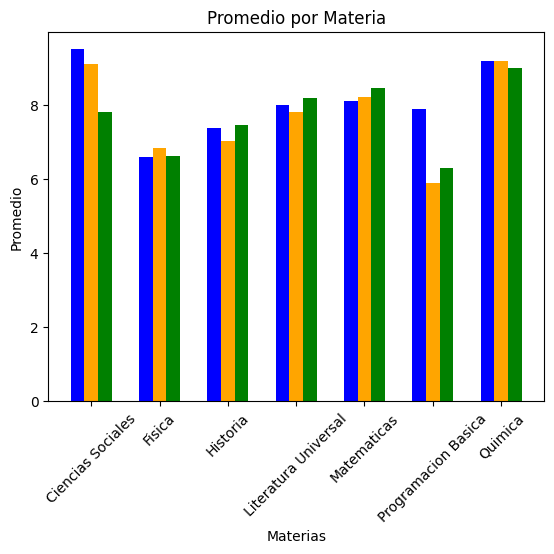

In [22]:
x = np.arange(len(promedio_materia))
plt.bar(x, promedio_materia['Parcial 1'], width=0.2, label='Parcial 1', color='blue')
plt.bar(x + 0.2, promedio_materia['Parcial 2'], width=0.2, label='Parcial 2', color='orange')
plt.bar(x + 0.4, promedio_materia['Final'], width=0.2, label='Final', color='green')
plt.xticks(x + 0.2, promedio_materia.index, rotation=45)
plt.xlabel('Materias')
plt.ylabel('Promedio')
plt.title('Promedio por Materia')



### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.

